# Домашнее задание №1

### **Dataset of depressive posts in Russian language collected from social media** [(paper)](https://www.sciencedirect.com/science/article/pii/S2352340920300895)

Скачать датасет в формате .tsv можно [здесь](https://yadi.sk/d/G5rq-R3AK8SOuw).


В качестве задания предлагается:
1. Использовать ```pandas``` и ряд инструментов для автоматической обработки текстов на русском языке, чтобы ответить на вопросы.
2. Написать функции для извлечения текстовых признаков.

Не рекомендуется использовать ```nltk``` для сегментации/токенизации текстов, поскольку существуют инструменты, которые выполняют свою задачу для русского значительно лучше – их мы обсуждали с вами на занятии.


**Дедлайн**: 23 сентября 23:59

In [195]:
import pandas as pd


df = pd.read_csv("depression_data.tsv", sep="\t")
df.head()

,text,label,age
0,"Когда-то я был добрым романтиком, который стре...",1,32.0
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0


### Часть 1: Простая статистика (2 балла)

Зачастую в данных, с которыми вы работаете, может быть много неприятных для обработки вещей. Например, мы видим, что в колонке ```age``` очень грязные значения.

In [196]:
df["age"].value_counts()

1.600000e+01    1823
1.700000e+01    1811
1.800000e+01    1661
1.500000e+01    1582
2.000000e+01    1543
1.900000e+01    1402
2.100000e+01    1273
1.400000e+01    1228
2.200000e+01    1154
2.300000e+01    1120
2.500000e+01    1011
2.400000e+01     917
2.600000e+01     760
2.700000e+01     700
1.300000e+01     673
2.800000e+01     608
3.000000e+01     577
2.900000e+01     479
1.200000e+01     353
3.200000e+01     338
3.100000e+01     311
3.300000e+01     274
3.500000e+01     269
3.400000e+01     243
4.000000e+01     213
3.800000e+01     212
3.600000e+01     208
3.700000e+01     182
3.900000e+01     144
1.100000e+01     117
                ... 
1.250000e+02       1
3.650000e+02       1
2.728000e+03       1
1.214000e+03       1
1.230012e+09       1
2.025000e+03       1
6.800000e+01       1
1.090000e+02       1
2.000000e+02       1
1.550000e+02       1
6.900000e+01       1
1.650000e+02       1
1.318000e+03       1
2.122000e+03       1
2.223000e+03       1
2.650000e+02       1
6.660000e+02 

1. Найдите среднее значение возраста в диапазоне от 14 до 50 лет включительно.

In [197]:
df[(df.age >= 14) & (df.age <= 50)]["age"].mean()

22.704171601526518

2. Какую долю 16-летние авторы составляют в диапазоне от 16 до 26 лет включительно?

In [198]:
# your code and output here
valueCounts = df["age"].value_counts()

valueCounts[16] / sum([valueCounts[x] for x in range(16, 27)])

0.1259412780656304

3. Сколько в датасете текстов, авторам которых 28 или 30 лет?

In [199]:
# your code and output here
valueCounts[28] + valueCounts[30]

1185

4. С помощью одной встроенной в ```pandas``` функции отобразите всю статистику по колонке ```age``` в диапазоне от 18 до 30 лет включительно.

In [200]:
# your code and output here
df[(df.age >= 18) & (df.age <= 30)]["age"].describe()

count    13205.000000
mean        22.676638
std          3.550254
min         18.000000
25%         20.000000
50%         22.000000
75%         25.000000
max         30.000000
Name: age, dtype: float64

5. Сколько в датасете положительных / отрицательных примеров?

In [201]:
# your code and output here

df["label"].value_counts()

0    32021
1    32018
Name: label, dtype: int64

### Часть 2: Предобработка (3 балла)

1. Посчитайте количество предложений в каждом тексте. Сохраните эти значения в отдельной колонке датафрейма.

In [202]:
# your code and output here

In [203]:
from razdel import sentenize, tokenize

In [204]:
df['sent_count'] = [len(list(sentenize(row['text']))) for index, row in df.iterrows()]

In [205]:
df.head()

,text,label,age,sent_count
0,"Когда-то я был добрым романтиком, который стре...",1,32.0,15
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0,6
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0,10
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0,5
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0,18


2. Напишите функцию для токенизации текста. Удалите стоп-слова.

In [210]:
# your code and output here

In [211]:
import nltk
from nltk.corpus import stopwords
from string import punctuation

In [212]:
stop = stopwords.words("russian")
print(stop)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

Но сначала! Пункт 6 про стопслова (сразу расширим список стопслов)

6. Какие слова мы можем добавить в список стоп-слов? Приведите примеры и объясните, почему.

Помимо отсутствующих в списке предлогов и местоимений имеет смысл избавляться от:

1. Числительных. Они не несут высокой смысловой нагрузки в случае нашего деперссивного датасета. Правда, засовывать их в список стопслов затратно, лучше попробовать удалять слова с определенными POS-тегами
2. Слов-пустышек, таких, как "ну", "короче", "очень"
3. Стандартных приветствий - на "приветик", "приветствую" посмотреть было бы интересно, а вот на нейтральные "привет" и "здравствуйте" уже не очень
4. Доменов сайтов и т.д.

In [213]:
own_stopwords = ["я", "ты", 'он', "она", "оно", "мы", "вы", "они", "и", "или", "но", "а", "не", "кто", "что",
                          "это", "этот", "эта", "эти", "этого", "этой", "этих", "этому", "этой", "этим", "этими",
                          "тот", "та", "те", "того", "той", "тех", "тому", "той", "тем", "теми",
                          "у", "к", "от", "о", "про", "без", "в", "с", "за", "около", "через", "перед", "под",
                          "привет", "здравствуй", "здравствуйте",
                          "vk", "http", "https", "ru", "com", "org"]

In [214]:
for stopword in own_stopwords:
    if stopword not in stop:
        stop.append(stopword)

In [215]:
print(stop)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

Возвращаемся к пункту 2

In [216]:
def tokenization(text):
    tokens = list(tokenize(text))
    return [token.text.lower() for token in tokens if token.text.lower() not in stop 
                                                   and token.text.lower() not in punctuation
                                                   and len(token.text) > 1]

3. Посчитайте количество токенов в тексте (без стоп-слов). Найдите среднее этих значений как по всей выборке, так и внутри каждого класса. 

In [217]:
# your code and output here

In [218]:
token_num = []
for index, row in df.iterrows():
    token_num.append(len(tokenization(row['text'])))
df['token_num'] = token_num

In [219]:
tokens_mean = df['token_num'].mean()
tokens_pos_mean = df[df.label == 0]['token_num'].mean()
token_neg_mean = df[df.label == 1]['token_num'].mean()

In [225]:
print('Среднее количество токенов: %f' % tokens_mean)
print('Среднее количество позитивных токенов: %f' % tokens_pos_mean)
print('Среднее количество депрессивных токенов: %f' % token_neg_mean)

Среднее количество токенов: 105.359047
Среднее количество позитивных токенов: 140.588239
Среднее количество депрессивных токенов: 70.126554


4. Напишите функцию, которая переводит текст в последовательность лемм.

In [221]:
# your code and output here

In [222]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [223]:
def lemmatization(text):
    tokens = tokenization(text)
    lemmas = [morph.parse(word)[0].normal_form for word in tokens]
    return lemmas
    #return ' '.join(lemmas)

In [224]:
lemmatization(df["text"][0])

['когда-то',
 'добрый',
 'романтик',
 'который',
 'стремиться',
 'помочь',
 'весь',
 'попросить',
 'жалко',
 'верить',
 'человечность',
 'однако',
 'фальший',
 'суррогатный',
 'дружба',
 'какой-то',
 'непонятный',
 'отношение',
 'девушка',
 'который',
 'клясться',
 'любить',
 'итог',
 'изменить',
 'уйти',
 'другой',
 'появиться',
 'бесперспективный',
 'попросту',
 'достаточный',
 'достаток',
 'собственный',
 'жильё',
 'родитель',
 'шизофрения',
 '20.2',
 'никто',
 'поддерживать',
 'поддерживать',
 'итак',
 'отдавать',
 'кусочек',
 'каждый',
 'потерять',
 'свой',
 'душевный',
 'тепло',
 'стать',
 'безразличный',
 'апатия',
 'бывший',
 'девушка',
 'всякий',
 'усилие',
 'найти',
 'новое',
 'который',
 'сразу',
 'жениться',
 'возить',
 'разный',
 'страна',
 'мир',
 'браться',
 'любой',
 'работа',
 'показать',
 'худой',
 'часто',
 'обманывать',
 'недоплачивать',
 'оплачивать',
 'вовсе',
 'простой',
 'неудачник',
 'который',
 'потерять',
 'смысл',
 'жизнь',
 'мой',
 'ситуация',
 'спасать',
 

5. Напишите функцию, которая переводит текст в последовательность частеречных тегов.

In [226]:
# your code and output here

In [229]:
def posTagger(text):
    tokens = tokenization(text)
    pos_tags = [morph.parse(word)[0].tag.POS for word in tokens]
    return pos_tags

In [230]:
posTagger(df["text"][0])

['ADVB',
 'ADJF',
 'NOUN',
 'ADJF',
 'VERB',
 'INFN',
 'ADJF',
 'VERB',
 'ADVB',
 'VERB',
 'NOUN',
 'CONJ',
 'ADJF',
 'ADJF',
 'NOUN',
 'ADJF',
 'ADJF',
 'NOUN',
 'NOUN',
 'ADJF',
 'VERB',
 'VERB',
 'NOUN',
 'VERB',
 'VERB',
 'ADJF',
 'VERB',
 'ADJF',
 'ADVB',
 'ADJF',
 'NOUN',
 'ADJF',
 'NOUN',
 'NOUN',
 'NOUN',
 None,
 'NPRO',
 'VERB',
 'VERB',
 'CONJ',
 'GRND',
 'NOUN',
 'ADJF',
 'VERB',
 'ADJF',
 'ADJF',
 'ADVB',
 'VERB',
 'ADJS',
 'NOUN',
 'ADJF',
 'NOUN',
 'ADJF',
 'NOUN',
 'VERB',
 'NOUN',
 'ADJF',
 'ADVB',
 'VERB',
 'VERB',
 'ADJF',
 'NOUN',
 'NOUN',
 'VERB',
 'ADJF',
 'NOUN',
 'INFN',
 'COMP',
 'ADVB',
 'VERB',
 'VERB',
 'VERB',
 'ADVB',
 'NOUN',
 'NOUN',
 'ADJF',
 'VERB',
 'NOUN',
 'NOUN',
 'ADJF',
 'NOUN',
 'VERB',
 'NOUN',
 'ADJF',
 'ADVB',
 'NOUN',
 'ADVB',
 'VERB',
 'NOUN',
 'VERB',
 'NOUN',
 'VERB',
 'VERB',
 'ADVB',
 'VERB',
 'ADJF',
 'ADJF',
 'NOUN',
 'ADVB',
 'VERB',
 'NOUN',
 'NPRO',
 'CONJ',
 'ADVB',
 'ADVB',
 'VERB',
 'NOUN',
 'PREP',
 'ADVB',
 'VERB',
 'ADJF',
 'V

### Часть 3: Визуализация (1 балл)

1. Визуализируйте распределение количество предложений / текст.

In [ ]:
# your code and output here

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [232]:
sentence_text = Counter()
for index, row in df.iterrows():
    sentence_text[row['sent_count']] += 1

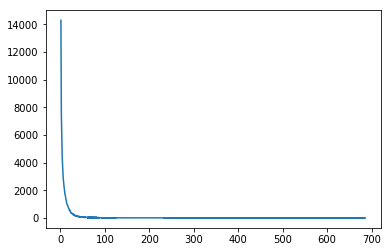

In [233]:
x = []
y = []
for i in sentence_text.most_common():
    x.append(i[0])
    y.append(i[1])
plt.plot(x,y)
plt.show()

2. Визуализируйте распределение количество-предложений / текст внутри каждого класса.

In [234]:
# your code and output here

In [235]:
sentence_text_neg = Counter()
sentence_text_pos = Counter()
for index, row in df.iterrows():
    if row['label'] == 1:
        sentence_text_neg[row['sent_count']] += 1
    else:
        sentence_text_pos[row['sent_count']] += 1

# Позитивные

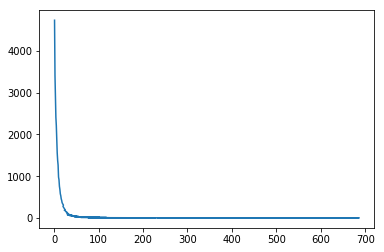

In [236]:
x = []
y = []
for i in sentence_text_pos.most_common():
    x.append(i[0])
    y.append(i[1])
plt.plot(x,y)
plt.show()

# Депрессивные

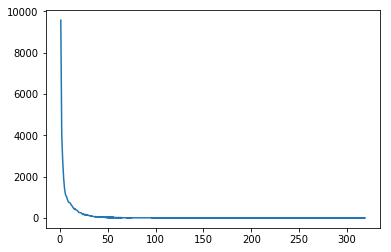

In [237]:
x = []
y = []
for i in sentence_text_neg.most_common():
    x.append(i[0])
    y.append(i[1])
plt.plot(x,y)
plt.show()

3. Верно ли, что количество предложений в тексте коррелирует с возрастом автора в подвыборке от 16 до 32 лет включительно? Если да, какая это корреляция – положительная или отрицательная? Визуализируйте матрицу корреляции.

In [238]:
# your code and output here

In [239]:
import seaborn as sn

In [240]:
age_filter = df[(df.age >= 16) & (df.age <= 32)]

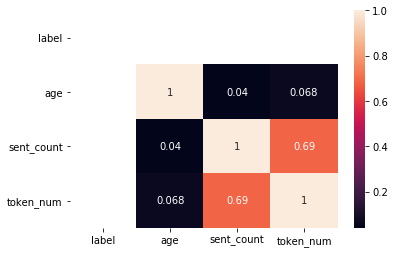

In [241]:
correlation = age_filter.corr()
sn.heatmap(correlation, annot=True)
plt.show()


По графику видно, что корреляция кол-ва предложений и возраста автора положительная.

### Часть 4: Извлечение текстовых признаков (4 балла)

1. Самостоятельно реализуйте функцию для получения посимвольных н-грамм (без использования библиотек).

In [242]:
# your code and output here

def char_ngrams(text, n):
    return [text[i:i + n] for i in range(0, len(text) - n + 1)]

In [243]:
# пример работы функции

text = "уставшая мама мыла грязную раму"

char_ngrams(text, n=3)[:10]

['уст', 'ста', 'тав', 'авш', 'вша', 'шая', 'ая ', 'я м', ' ма', 'мам']

2. Самостоятельно реализуйте функцию для получения пословных н-грамм (без использования библиотек).

In [244]:
# your code and output here
def word_ngrams(text, n):
    tokens = tokenization(text)
    return char_ngrams(tokens, n)

In [245]:
# пример работы функции

word_ngrams(text, n=3)

[['уставшая', 'мама', 'мыла'],
 ['мама', 'мыла', 'грязную'],
 ['мыла', 'грязную', 'раму']]

In [246]:
word_ngrams(text, n=4)

[['уставшая', 'мама', 'мыла', 'грязную'], ['мама', 'мыла', 'грязную', 'раму']]

3. Самостоятельно реализуйте функцию для получения н-грамм лемм (без использования библиотек).

In [247]:
# your code and output here
def lemma_ngrams(text, n):
    lemmas = lemmatization(text)
    return char_ngrams(lemmas, n)

In [248]:
# пример работы функции

lemma_ngrams(text, n=3)

[['устать', 'мама', 'мыло'],
 ['мама', 'мыло', 'грязный'],
 ['мыло', 'грязный', 'рам']]

In [249]:
lemma_ngrams(text, n=4)

[['устать', 'мама', 'мыло', 'грязный'], ['мама', 'мыло', 'грязный', 'рам']]

4. Самостоятельно реализуйте функцию для получения н-грамм частеречных тегов (без использования библиотек).

In [250]:
# your code and output here
def pos_ngrams(text, n):
    pos_tags = posTagger(text)
    return char_ngrams(pos_tags, n)

In [251]:
# пример работы функции

pos_ngrams(text, n=3)

[['PRTF', 'NOUN', 'NOUN'], ['NOUN', 'NOUN', 'ADJF'], ['NOUN', 'ADJF', 'NOUN']]

In [252]:
pos_ngrams(text, n=4)

[['PRTF', 'NOUN', 'NOUN', 'ADJF'], ['NOUN', 'NOUN', 'ADJF', 'NOUN']]

5. Самостоятельно реализуйте функцию для получения частотного словаря частеречных тегов по коллекции документов.

In [253]:
# your code and output here

def build_pos_dict(corpus):
    freq_dict = {}
    for text in corpus:
        tags = posTagger(text)
        for t in tags:
            if t not in freq_dict:
                freq_dict[t] = 1
            else:
                freq_dict[t] += 1
    return freq_dict

In [254]:
# пример работы функции

corpus = [
    "мама мыла уставшую раму",
    "высшая школа экономики",
    "компьютерная лингвистика",
    "осень наступила"
]

build_pos_dict(corpus)

{'NOUN': 7, 'PRTF': 1, 'ADJF': 2, 'VERB': 1}

6. Постройте частотный словарь лемм по текстам внутри каждого класса. Найдите топ-15 лемм для текстов каждого класса. Есть ли между этими списками пересечение? Если да, сколько лемм пересекается?

In [255]:
# your code and output here

In [256]:
pos = df[(df['label'] == 0)]
neg = df[(df['label'] == 1)]

In [261]:
def build_lemm_dict(corpus):
    lemmas_dict = {}
    for index, row in corpus.iterrows():
        lemmas = lemmatization(row['text'])
        for lemma in lemmas:
            if lemma in lemmas_dict.keys():
                lemmas_dict[lemma] += 1
            else:
                lemmas_dict[lemma] = 1
    return lemmas_dict

In [262]:
pos_lemmas = build_lemm_dict(pos)
neg_lemmas = build_lemm_dict(neg)

In [263]:
neg_lemmas_sorted = {k: v for k, v in sorted(neg_lemmas.items(), key=lambda item: item[1])}

In [264]:
pos_lemmas_sorted = sorted(pos_lemmas.items(), key=lambda x: x[1], reverse=True)
neg_lemmas_sorted = sorted(neg_lemmas.items(), key=lambda x: x[1], reverse=True)

In [265]:
pos_lemmas_sorted[:15]

[('год', 43876),
 ('который', 26291),
 ('один', 17556),
 ('проект', 16652),
 ('свой', 15479),
 ('наш', 15433),
 ('город', 14453),
 ('работа', 14257),
 ('день', 14107),
 ('апрель', 14053),
 ('также', 13713),
 ('россия', 13418),
 ('область', 13396),
 ('компания', 12001),
 ('человек', 11211)]

In [266]:
neg_lemmas_sorted[:15]

[('...', 31848),
 ('год', 28450),
 ('жить', 25568),
 ('хотеть', 24525),
 ('жизнь', 24254),
 ('мочь', 21324),
 ('человек', 19236),
 ('весь', 18923),
 ('очень', 18423),
 ('мой', 17515),
 ('просто', 16200),
 ('знать', 15877),
 ('который', 14926),
 ('свой', 14614),
 ('..', 13568)]

Пересечения есть - это леммы "год", "который", "свой", "человек". И теперь стало очень интересно, что же такого позитивного люди находят в апреле... :))

7. Какие текстовые признаки могли бы быть полезными для решения задачи классификации на этих данных? Приведите примеры и перечислите ресурсы, которые вы бы использовали для конструирования этих признаков.

# Ответ

Во-первых, можно посмотреть на именованные сущности, в частности, города (они извлекаются с помощью natasha). В каких городах пишут больше депрессивных постов, а в каких - больше позитивных? Какие зависимости прослеживаются между эмоциональной окраской поста, городом и возрастом автора? И т.д.

Также было бы интересно взглянуть на пунктуацию. Почему-то интуитивно кажется, что в позитивно окрашенных постах будет больше знаков препинания, а также будут присутствовать "сложные" знаки препинания, такие как двоеточия, тире, точки с запятой - а в депрессивных постах пунктуация будет проще и её будет меньше. Но, как видно из выборки частотных лемм, в депрессивных текстах может быть больше точек и двоеточий.

Чтобы изучить пунктуацию, будет достаточно питоновских регулярок.

Ещё интересно выявить, в какое время года люди больше склонны к депрессии. К сожалению, в датасете нет информации о дате-времени создания каждого поста, поэтому можно попробовать вытащить из текстов даты и месяцы с помощью той же natasha и/или новых правил для yargy. Вот, например, в позитивных текстах часто встречался апрель.